# Emerging Technologies Project

These are my solutions to my final year module Emerging Technologies project. \
Authored by William Vida.

## Instructions
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.

To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.

## Research
### Wind Turbines
Wind Turbines convert kinetic energy from the wind to into mechanical or electrical energy that can be used for power. Wind turbines produce electricity by using rotational energy to drive an electrical generator. They are made up of a blade or rotor, and an enclosure called a nacelle that contains a drive train on top of a tall tower [3].
<img src="https://cdn.britannica.com/48/121648-050-496C79EF/Components-wind-turbine.jpg" title="Wind Turbine" alt="Wind Turbine" width="50%">

### Machine Learning
Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the premise that, with minimal human interaction, systems can learn from data, recognize trends and make decisions [1].

In data science, an algorithm is a series of steps for statistical processing. In machine learning, algorithms are "trained" to identify patterns and features for a large number of quantities of data to make new data-based decisions and predictions. The better the algorithm, the more accurate the decisions and the predictions will become as it processes more data [1].

### How Machine Learning Works
There are four steps for building a machine learning application (or model) [1].

**Step 1: Select and prepare a training data set** \
Training data is a data set representative of the data that the machine learning model would use to solve the problem it is programmed to solve. In certain instances, the training data is labelled data—"tagged" to identify the features and classifications that the model would need to identify. Other data is unlabelled, and the model will need to extract those features and assign classifications on its own. In either case, the training data need to be reviewed to reduce the risk of biases the could affect the training.

**Step 2: Choose an algorithm to run on the training data set** \
The type of algorithm depends on the type (labelled/supervised learning or unlabelled/unsupervised learning), the amount of data in the training data set and on the type of problem that has to be solved. Machine learning algorithms for labelled data sets include regression algorithms, decision trees and instance-based algorithms. While machine learning algorithms for unlabelled data sets include clustering algorithms, association algorithms and neural networks.

**Step 3: Training the algorithm to create the model** \
Training the algorithm is an iterative process. It involves running variables through the algorithm, comparing the output with the expected output, minimising biases in the algorithm, and running through the variables again until the algorithm produces an accurate result most of the time. The resulting trained, accurate algorithm is the machine learning model.

**Step 4: Using and improving the model** \
The model is used with new data to improve its accuracy effectiveness.

### Supervised Machine Learning
Supervised machine learning trains itself on a labelled data set. The data is labelled with information that the machine learning model can determine how the model classifies the data. Supervised machine learning requires less training data than other machine learning methods and makes training simpler since the outputs of the model can be compared to the actual labelled results [1].

### Unsupervised Machine Learning
Unsupervised machine learning uses an unlabelled data set. It uses algorithms to extract important features needed to label, sort and classify the data in real-time and without human intervention. Unsupervised learning is less about automating decisions and predictions but more about identifying patterns and relationships in data [1].

## The Data

In [406]:
import numpy as np
import statsmodels.stats.weightstats as stat
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import csv
from numpy.polynomial.polynomial import polyfit
from statistics import mean
import tensorflow.keras as kr
import sklearn.cluster as skcl
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [618]:
# Set the file and read it.
speedPowerFile = "powerproduction.csv"
speedPower = pd.read_csv(speedPowerFile)

In [408]:
# Output the data.
speedPower

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [409]:
# Shape of the data.
speedPower.shape

(500, 2)

In [410]:
# Information about the data.
speedPower.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


## Graphs of the Data With the Line of Best Fit

In [411]:
# Set the style of the graphs.
plt.style.use("bmh")

# Set the size of the graphs.
plt.rcParams["figure.figsize"] = [20, 10]

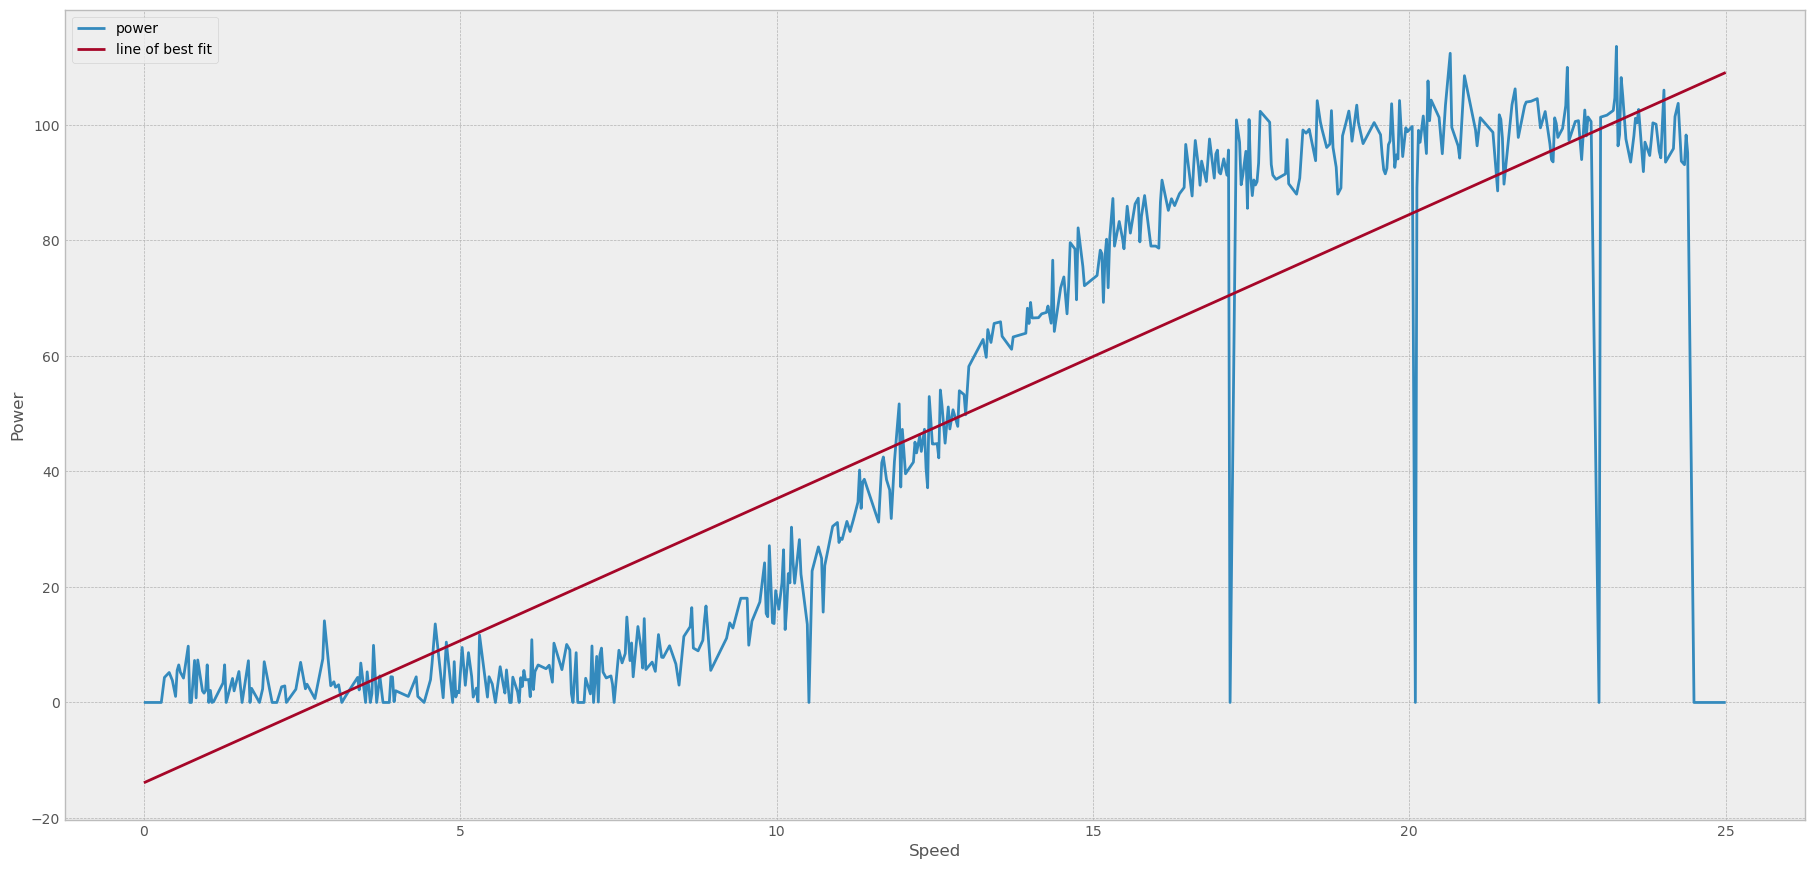

In [412]:
# Line of best fit https://stackoverflow.com/a/31800660.
speedPower.plot(x = "speed", y = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]), label = "line of best fit")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend(loc = "upper left")
plt.show()

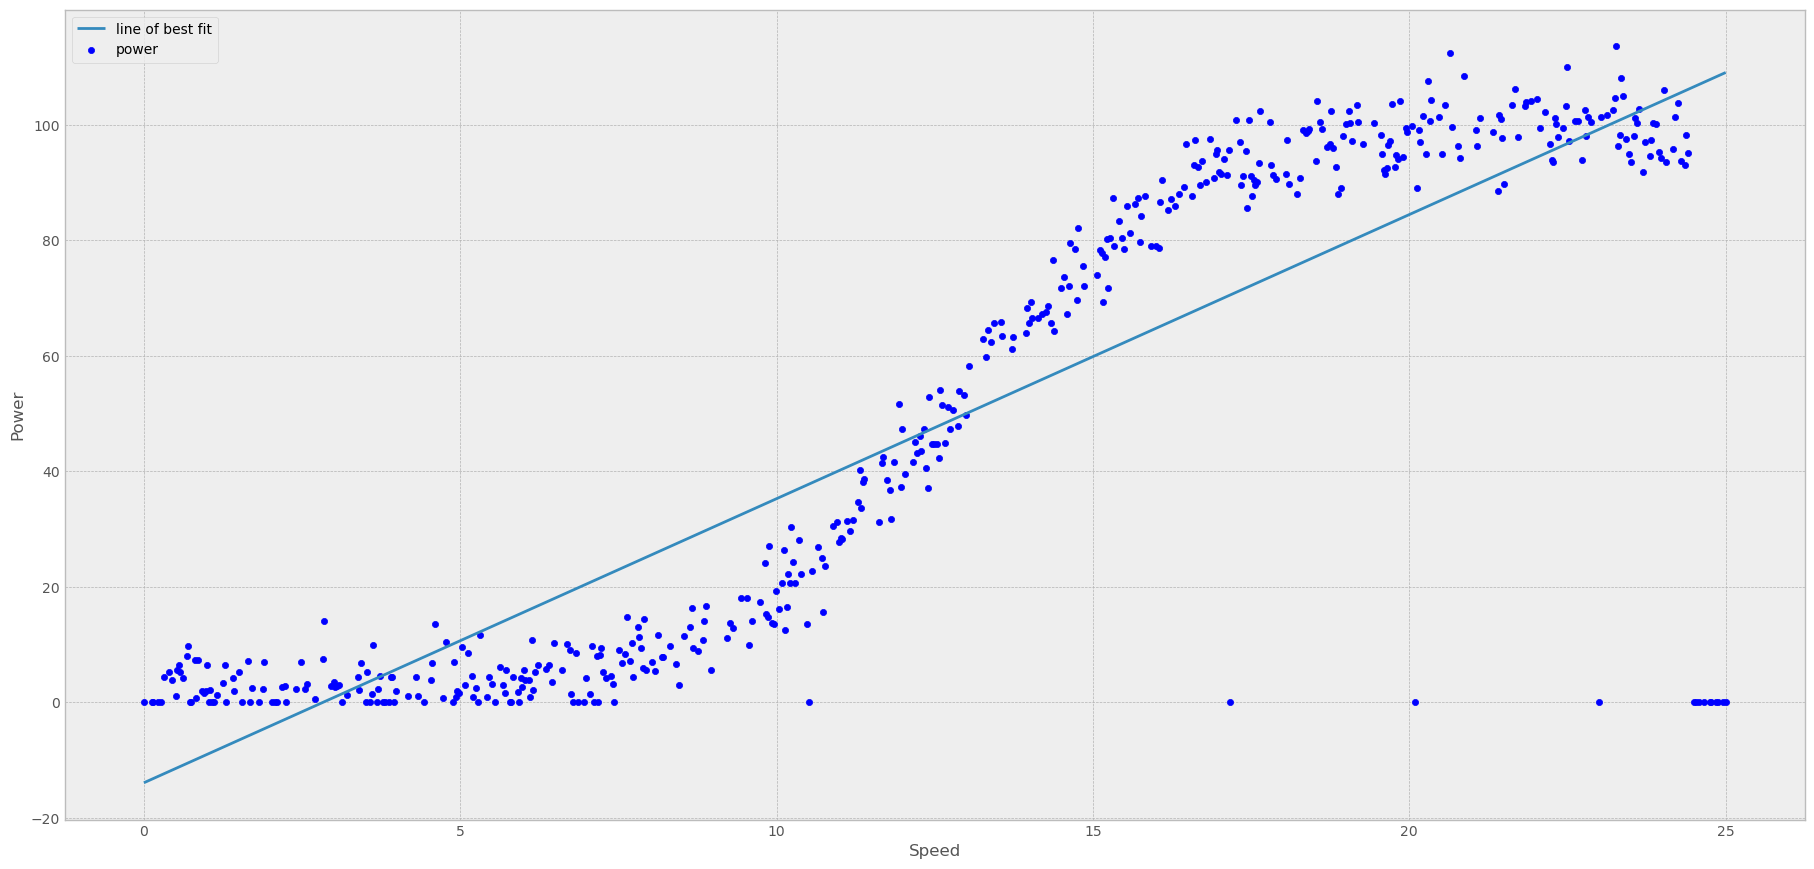

In [413]:
speedPower.plot.scatter(x = "speed", y = "power", label = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]), label = "line of best fit")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend(loc = "upper left")
plt.show()

## Remove the Outliers
The data has instances where the power output is zero even when the wind speed is zero. The zeroes must be removed as they are outliers and can cause discrepancies for the predictions. This does remove the first row where zero speed produces zero power. The outliers are removed by querying the file. The data without the zeroes will be data that will be used moving forward.

In [469]:
# Remove the zeroes.
speedPower = pd.read_csv(speedPowerFile).query("power > 0")

In [470]:
# The data without the outliers.
speedPower

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [471]:
# Shape of the data without the outliers.
speedPower.shape

(451, 2)

In [472]:
# Information about the data without the outliers.
speedPower.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


## Graphs of the Data Without the Outliers With the Line of Best Fit

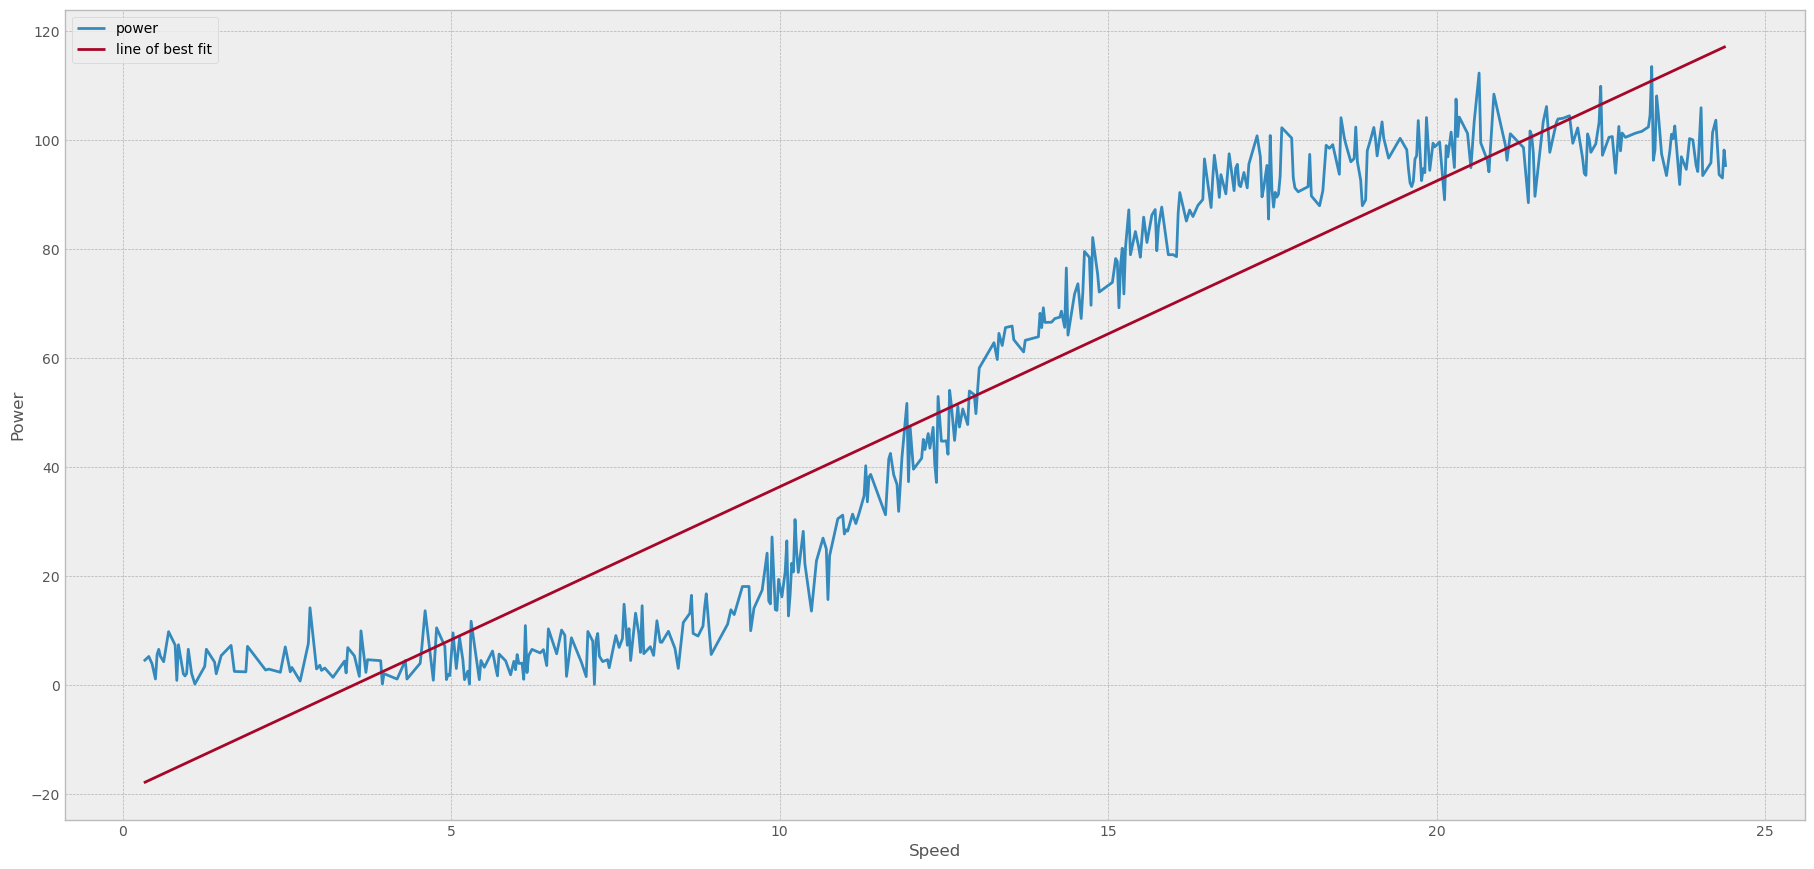

In [418]:
speedPower.plot(x = "speed", y = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]), label = "line of best fit")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend(loc = "upper left")
plt.show()

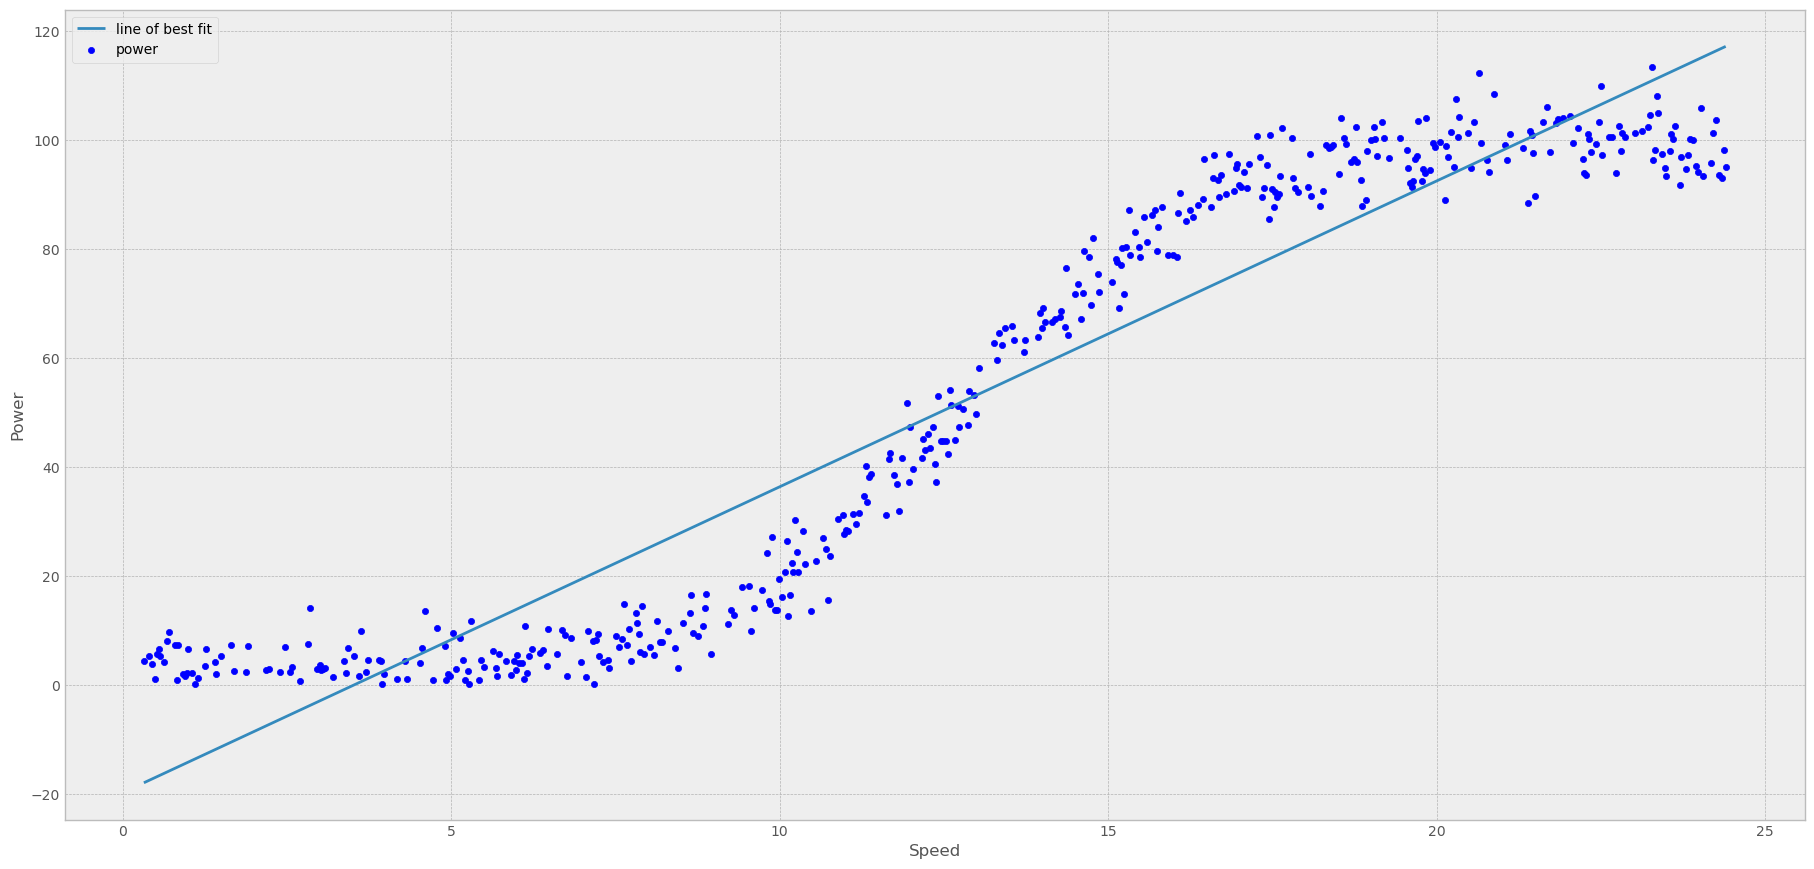

In [419]:
speedPower.plot.scatter(x = "speed", y = "power", label = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]), label = "line of best fit")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend(loc = "upper left")
plt.show()

## Prediction Using Linear Regression

### Research
The graph with the line of best fit shows that the data has a vaguely similar relationship to a linear model.

Linear regression is a linear model that assumes a linear relationship between an input variable and the output variable. If there is a single input then it is referred to as a simple linear regression. If there are more than one input variables then it is referred to as multiple linear regression [4].

### Code

In [420]:
X = speedPower.iloc[:, :-1].values
y = speedPower.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("y-intercept", regressor.intercept_)
print("Estimated coefficients", regressor.coef_)

y-intercept -22.87778398825072
Estimated coefficients [5.79588728]


In [421]:
input = [[4.605]]
y_pred = regressor.predict(input)

print("Input is", input, "Prediction is", y_pred, "Actual is 13.592")
print("Mean Absolute Error:", metrics.mean_absolute_error(input, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(input, y_pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(input, y_pred)))

Input is [[4.605]] Prediction is [3.81227696] Actual is 13.592
Mean Absolute Error: 0.7927230448923019
Mean Squared Error: 0.6284098259033225
Root Mean Squared Error 0.7927230448923019


In [422]:
input = [[22.072]]
y_pred = regressor.predict(input)

print("Input is", input, "Prediction is", y_pred, "Actual is 99.46")
print("Mean Absolute Error:", metrics.mean_absolute_error(input, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(input, y_pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(input, y_pred)))

Input is [[22.072]] Prediction is [105.04904015] Actual is 99.46
Mean Absolute Error: 82.97704014677794
Mean Squared Error: 6885.189191519998
Root Mean Squared Error 82.97704014677794


In [619]:
print(regressor.predict([[0], [5], [10], [15], [20], [25]]))
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

[-22.87778399   6.10165243  35.08108885  64.06052527  93.03996169
 122.01939811]
0 should output 0
5 is between an output of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an output of 72.135 and 73.911
20 is between an output of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


## Prediction Using K-Nearest Neighbours Regression
### Research
K-nearest neighbours regression is regression based on k-nearest neighbours [5].

> In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors [6].

K-nearest neighbours is a supervised machine learning algorithm that tries to determine how likely a data point is a member of one group depending on the data points around it [2].

### Code

In [592]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

# Set the data.
X = speedPower.iloc[:, :-1].values
y = speedPower.iloc[:, 1].values

# Confirm that the correct data is being used.
speedPower

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [593]:
# Set the number of neighbours.
neigh = KNeighborsRegressor(n_neighbors = 2)
neigh.fit(X, y)

# Since the first row was removed, 0 speed will incorrectly return a number greater than 0.
print(neigh.predict([[0], [5], [10], [15], [20], [25]]))
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

[ 4.7585  5.6    17.7465 76.0975 99.2435 96.67  ]
0 should outout 0
5 is between an outout of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an outout of 72.135 and 73.911
20 is between an outout of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


## Prediction Using Neural Networks

### Research
Neural networks or artificial neural networks (to avoid confusion with biological networks) are a series of algorithms that are designed to recognise patterns and relationships of data. A neuron is a mathematical function that collects and classifies information [7].

The input layer is the initial data for the neural network, the hidden layers are where all the calculations are done and it is between the input and output layers and the output layer produces the result [8].

<img src="https://miro.medium.com/max/625/1*3fA77_mLNiJTSgZFhYnU0Q.png" width="50%" title="Neural Network Architecture" alt="Neural Network Architecture">

<img src="https://www.investopedia.com/thmb/NOO1xErge30btK0nVZeEB6h_8xo=/2462x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/dotdash_Final_Neural_Network_Apr_2020-01-5f4088dfda4c49d99a4d927c9a3a5ba0.jpg" width="50%" title="A Simple Neural Network" alt="A Simple Neural Network">

### Code

In [595]:
# Confirm that the correct data is being used.
train = pd.DataFrame()
train["x"] = speedPower["speed"]
train["y"] = speedPower["power"]
train

,x,y
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


### Using a Linear Activation Neuron

In [596]:
# Create a neural network with a single linear activation neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "one", bias_initializer = "zero"))
model.compile("adam", loss = "mean_squared_error")

In [597]:
# Fit the data to the model with epochs of 500.
model.fit(train["x"], train["y"], epochs = 500, verbose = 0)

In [598]:
# Predict this model on some values.
print(model.predict([0, 5, 10, 15, 20, 25]))
print("0 should output 0")
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

[[  0.7743488]
 [ 22.622147 ]
 [ 44.469944 ]
 [ 66.31773  ]
 [ 88.165535 ]
 [110.01333  ]]
0 should outout 0
0 should outout 0
5 is between an outout of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an outout of 72.135 and 73.911
20 is between an outout of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


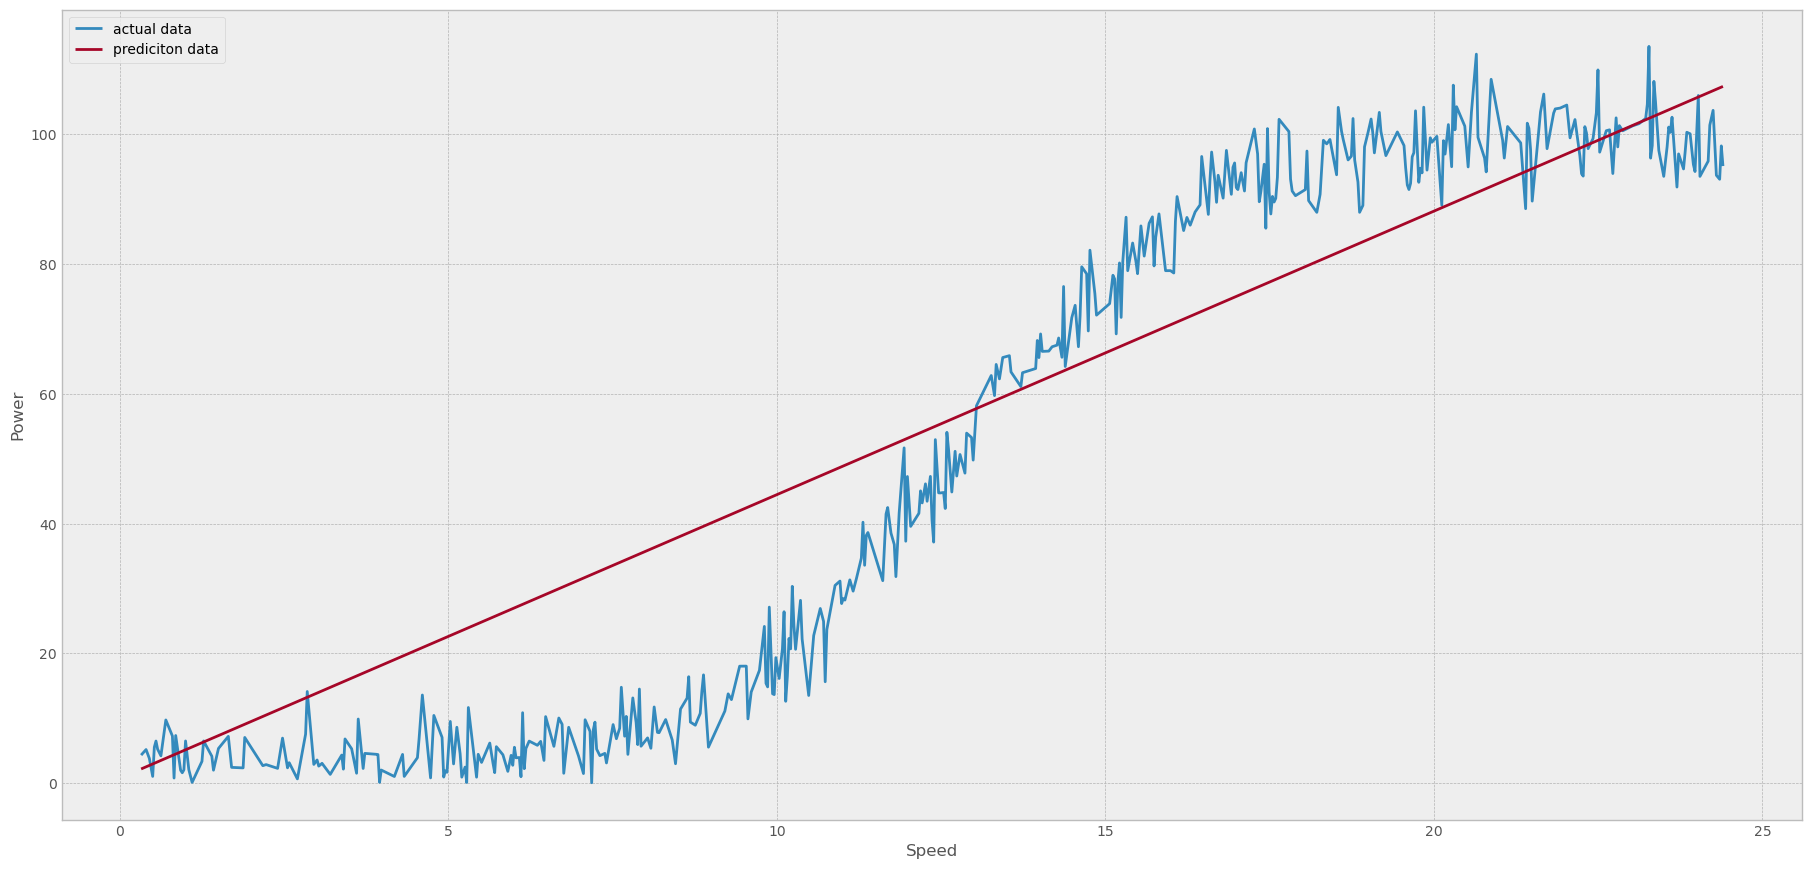

In [599]:
# Graph the actual data with the predicted data.
plt.plot(speedPower["speed"], speedPower["power"], label = "actual data")
plt.plot(train["x"], model.predict(train["x"]), label = "prediciton data")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend(loc = "upper left")
plt.show()

#### Conclusion
A neural network using one linear activation neuron provides a similar result to the linear regression model and it is inaccurate most of the time.

### Using a Sigmoid Activation Neuron

In [600]:
# Create a neural network with a single sigmoid activation neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "sigmoid", kernel_initializer = "one", bias_initializer = "zero"))
model.compile("adam", loss = "mean_squared_error")

In [601]:
# Fit the data to the model with epochs of 500.
model.fit(train["x"], train["y"], epochs = 500, verbose = 0)

In [602]:
# Predict this model on some values.
print(model.predict([0, 5, 10, 15, 20, 25]))
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

[[0.93981004]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]]
0 should outout 0
5 is between an outout of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an outout of 72.135 and 73.911
20 is between an outout of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


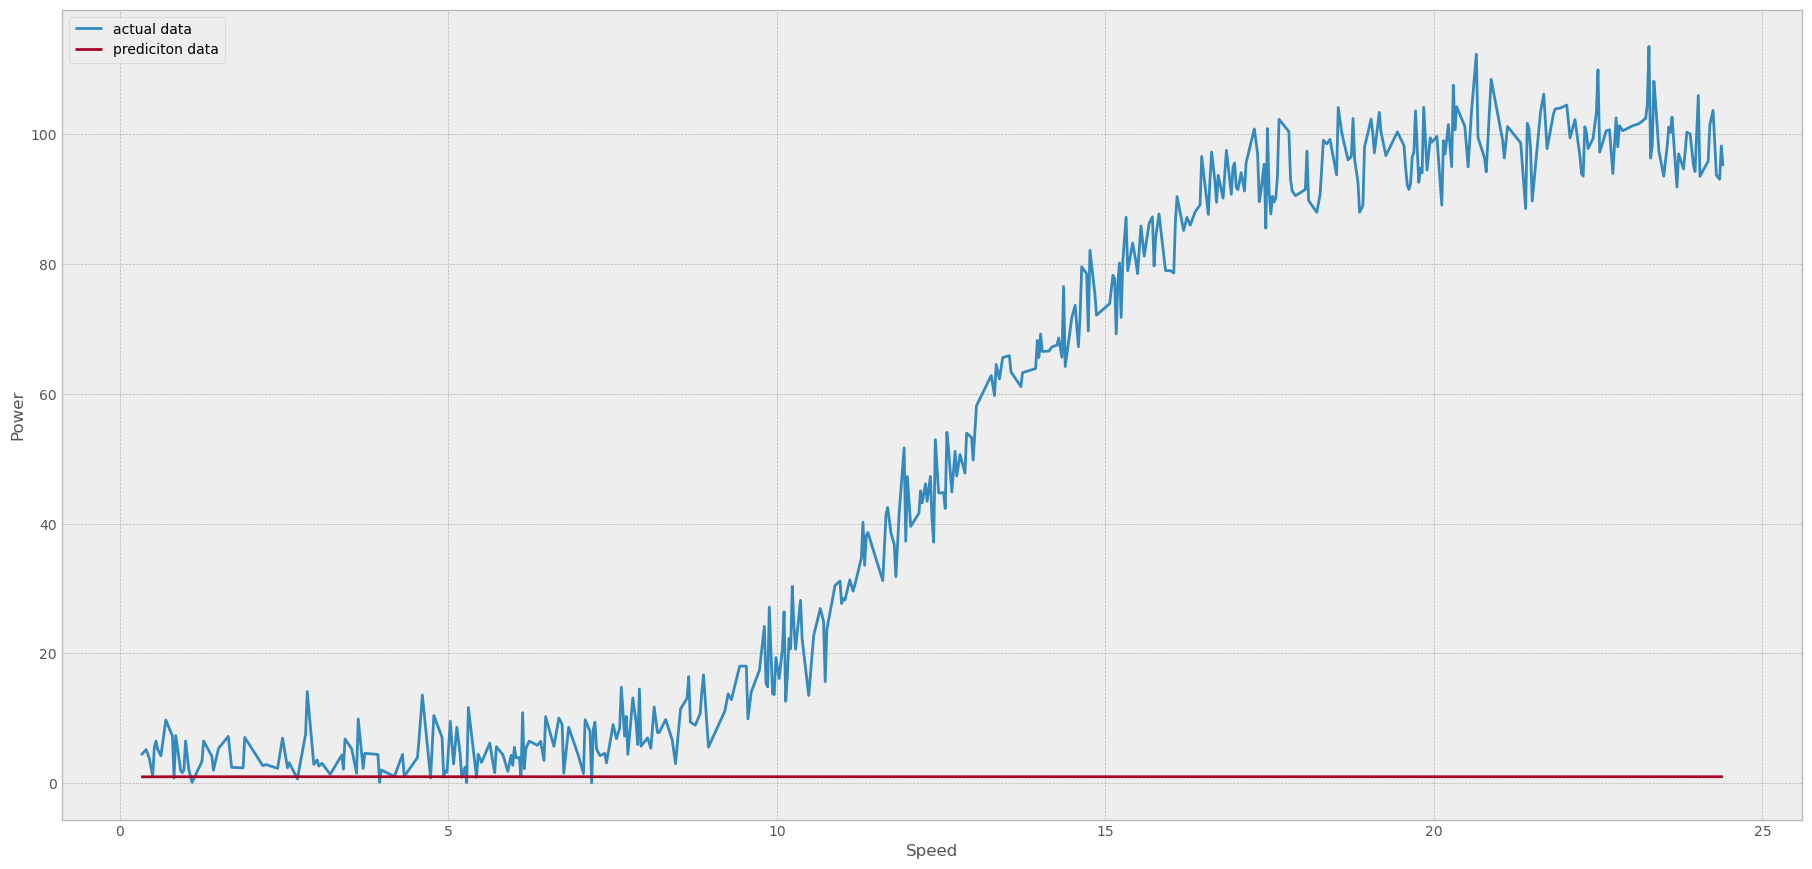

In [603]:
# Graph the actual data with the predicted data.
plt.plot(speedPower["speed"], speedPower["power"], label = "actual data")
plt.plot(train["x"], model.predict(train["x"]), label = "prediciton data")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend(loc = "upper left")
plt.show()

#### Conclusion
A neural network using one sigmoid activation neuron should not be used as nearly every input outputs a number that is nearly 1.

### Combining Sigmoid and Linear Activation Neurons

In [604]:
# Create a neural network with two sigmoid activation neurons and three linear activation neurons.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "sigmoid", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "sigmoid", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.compile("adam", loss = "mean_squared_error")

In [605]:
# Fit the data to the model with epochs of 1000.
model.fit(train["x"], train["y"], epochs = 1000, verbose = 0)

In [606]:
# Predict this model on some values.
print(model.predict([0, 5, 10, 15, 20, 25]))
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

[[  3.325628 ]
 [  4.8635707]
 [ 19.013899 ]
 [ 79.15572  ]
 [ 97.97763  ]
 [100.017624 ]]
0 should outout 0
5 is between an outout of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an outout of 72.135 and 73.911
20 is between an outout of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


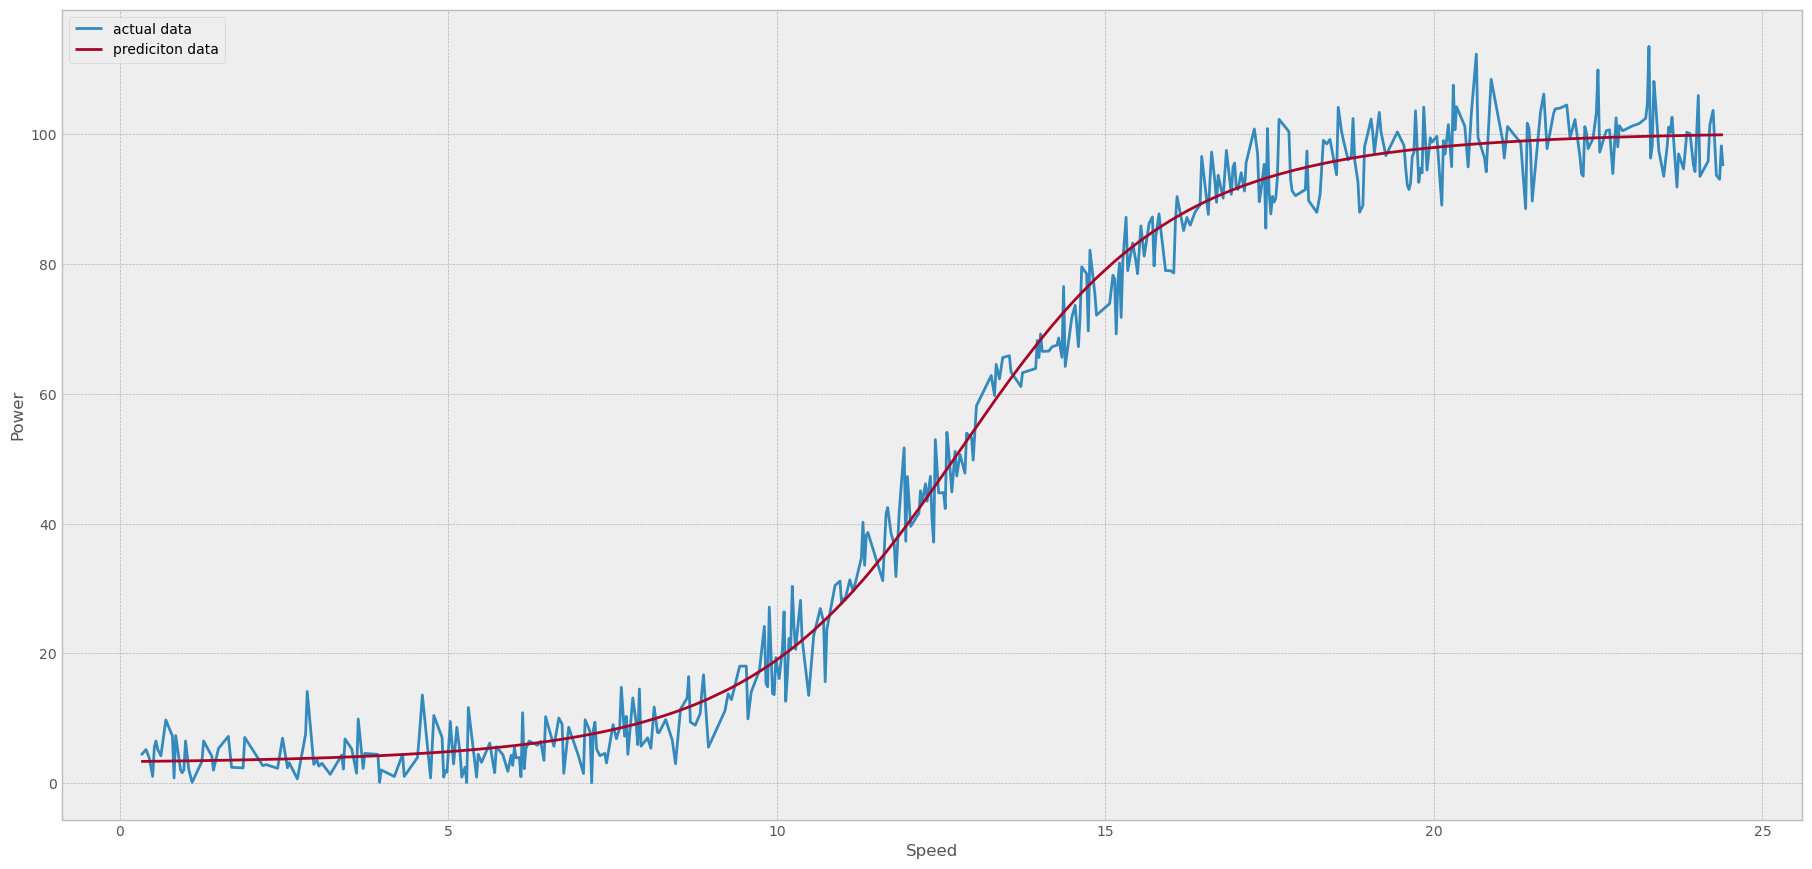

In [607]:
# Graph the actual data with the predicted data.
plt.plot(speedPower["speed"], speedPower["power"], label = "actual data")
plt.plot(train["x"], model.predict(train["x"]), label = "prediciton data")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend(loc = "upper left")
plt.show()

#### Conclusion
A neural network using two sigmoid activation neurons and three linear activation neurons provide an accurate result for input data.

### Combining Even More Sigmoid and Linear Activation Neurons

In [613]:
# This is probably overkill but this creates a neural network with three sigmoid activation neurons and five linear activation neurons.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "sigmoid", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "sigmoid", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "sigmoid", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.add(kr.layers.Dense(1, input_shape = (1,), activation = "linear", kernel_initializer = "ones", bias_initializer = "zeros"))
model.compile("adam", loss = "mean_squared_error")

In [614]:
# Fit the data to the model with epochs of 1000.
model.fit(train["x"], train["y"], epochs = 1000, verbose = 0)

In [615]:
# Predict this model on some values.
print(model.predict([0, 5, 10, 15, 20, 25]))
print("0 should output 0")
print("5 is between an output of 1.681 and 9.519")
print("10 is between an output 19.354 and 16.139")
print("15 is between an output of 72.135 and 73.911")
print("20 is between an output of 98.79 and 99.697")
print("25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556")

[[  3.1045694]
 [  4.819965 ]
 [ 19.10888  ]
 [ 78.563675 ]
 [ 98.066345 ]
 [100.6152   ]]
0 should outout 0
5 is between an outout of 1.681 and 9.519
10 is between an output 19.354 and 16.139
15 is between an outout of 72.135 and 73.911
20 is between an outout of 98.79 and 99.697
25 outputs 0 but the previous non 0 power is 95.117 and highest output is 113.556


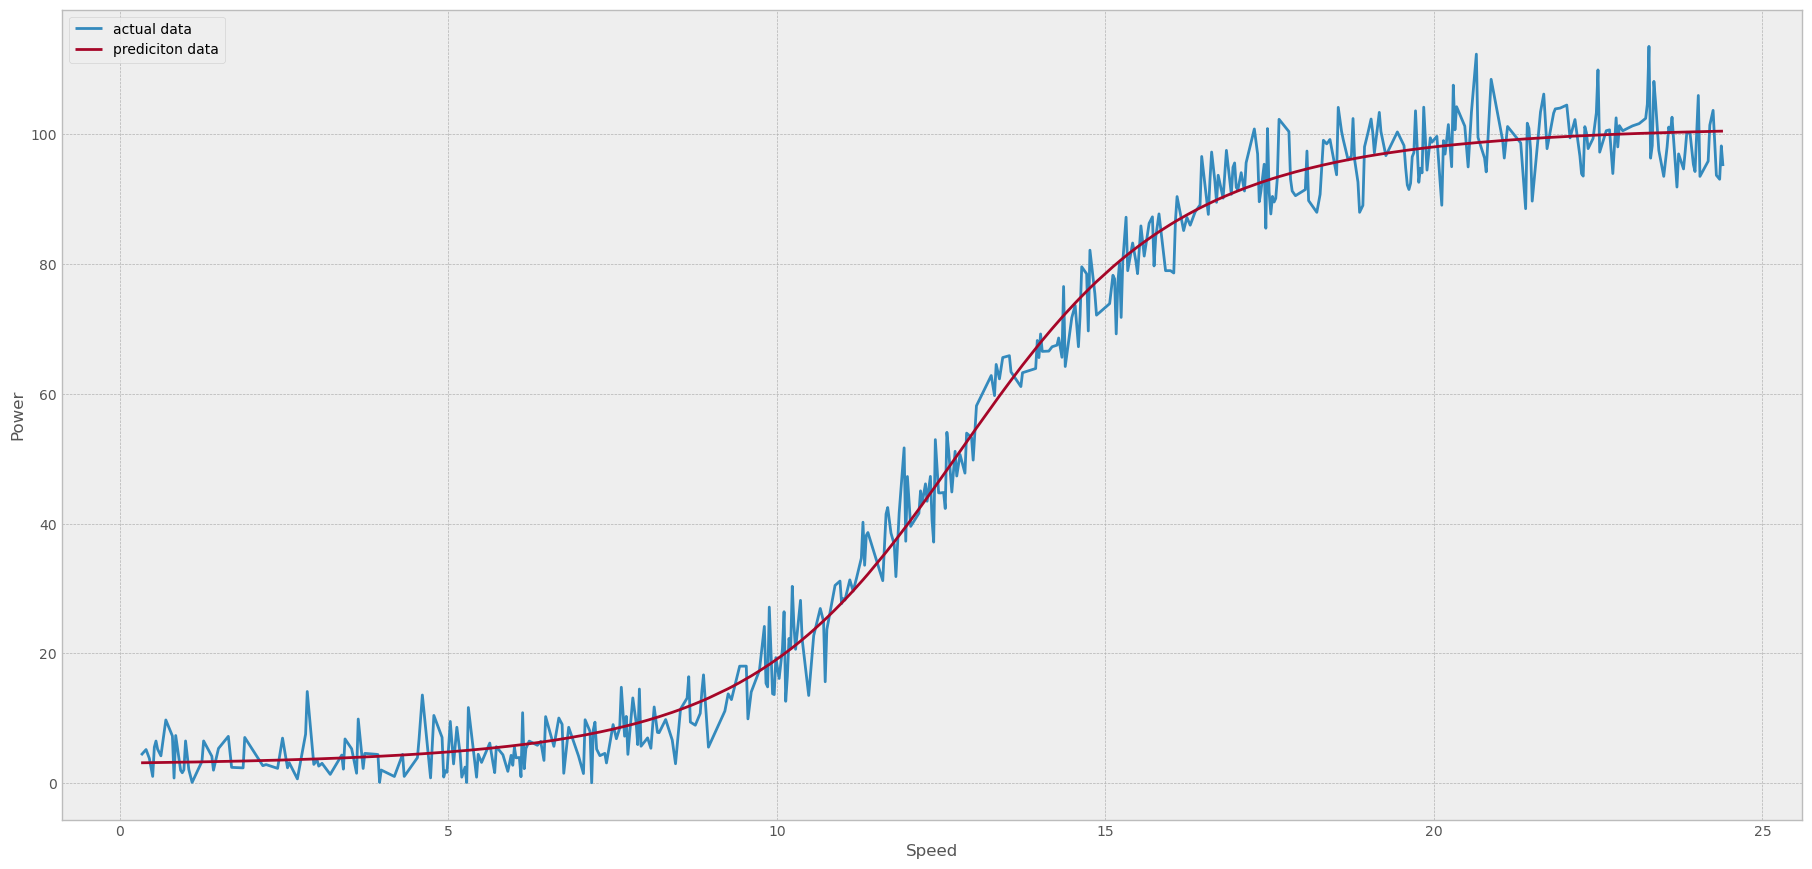

In [616]:
# Graph the actual data with the predicted data.
plt.plot(speedPower["speed"], speedPower["power"], label = "actual data")
plt.plot(train["x"], model.predict(train["x"]), label = "prediciton data")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend(loc = "upper left")
plt.show()

In [617]:
# Save the model.
model.save("model.h5")

#### Conclusion
A neural network using three sigmoid activation neurons and five linear activation neurons outputs accurate data and it is extremely similar results to the previous neural network.

## References
[1] Machine Learning; https://www.ibm.com/cloud/learn/machine-learning;

[2] K-Nearest Neighbor (K-NN); https://www.techopedia.com/definition/32066/k-nearest-neighbor-k-nn;

[3] Wind power; https://www.britannica.com/science/wind-power;

[4] Linear Regression for Machine Learning; https://machinelearningmastery.com/linear-regression-for-machine-learning/;

[5] sklearn.neighbors.KNeighborsRegressor; https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html;

[6] k-nearest neighbors algorithm; https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm;

[7] Neural Network; https://www.investopedia.com/terms/n/neuralnetwork.asp;

[8] Everything you need to know about Neural Networks and Backpropagation — Machine Learning Easy and Fun; https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a;